# 泰坦尼克号数据分析报告

## 1. 研究问题

在这个项目中，我们将探索泰坦尼克号的旅客名单，探讨有哪些因素会让泰坦尼克号船上的乘客生还率更高？

## 2. 数据整理

首先载入分析所需的python模块，将存有数据的csv文件读取为加载到 pandas DataFrame，并使用 .head() 函数显示前几项乘客数据。

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从泰坦尼克号的数据样本中，我们可以看到船上每位旅客的特征

- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
- **Name**：船上乘客的名字
- **Sex**：船上乘客的性别
- **Age**:船上乘客的年龄（可能存在 `NaN`）
- **SibSp**：乘客在船上的兄弟姐妹和配偶的数量
- **Parch**：乘客在船上的父母以及小孩的数量
- **Ticket**：乘客船票的编号
- **Fare**：乘客为船票支付的费用
- **Cabin**：乘客所在船舱的编号（可能存在 `NaN`）
- **Embarked**：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）

### 处理缺失值

通过对数据的初步探索发现，该数据集包含11个特征变量和891条记录。

此外，数据中的有三个特征变量包含缺失值，Age，Cabin和 Embarked，在此根据不同情况分别处理。

Cabin 变量缺失值较多，超过总记录数的1/2， 并且不考虑作为问题分析的相关变量， 因此直接从数据集中删去。

In [165]:
titanic_data = titanic_df.drop('Cabin', axis = 1)

Embarked 为分类变量，且仅有两个缺失值，此处选择用该变量的众数填补。

In [166]:
Embarked_mode = str(titanic_data['Embarked'].mode()[0])
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(Embarked_mode)

Age变量缺失值也比较较多，把Age当中的无效项目排除。

In [167]:
titanic_data = titanic_data[~np.isnan(titanic_data['Age'])]
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


**这样一来，最后的数据集包含10个特征变量，1个目标变量和714条记录。**

In [168]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 3. 数据探索-单一变量

本研究中以描述乘客是否生还的Survived变量做为因变量，并选择乘客性别（Sex）,乘客等级（Pclass）, 乘客年龄（Age）几个变量作为自变量，探索乘客各属性的分布情况及自变量与因变量间的关系。

### 性别（Sex）变量分析

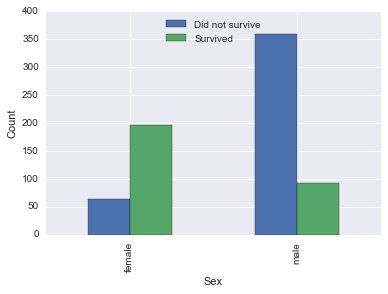

In [169]:
sex_survived = titanic_data.groupby(['Sex', 'Survived']).size()
sex_survived.unstack().plot(kind = 'bar')
plt.ylabel('Count')
plt.legend(['Did not survive','Survived'],loc="upper center")

In [170]:
print sex_survived.unstack()

Survived    0    1
Sex               
female     64  197
male      360   93


生还者中，男性人数为93人，女性人数为197人。
遇难者中，男性人数为360人，女性人数为64人。

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


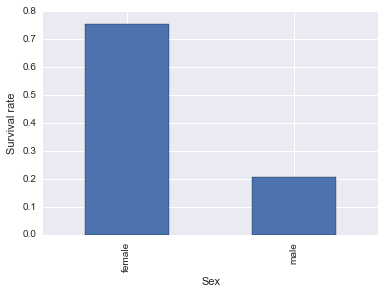

In [171]:
print titanic_data.groupby('Sex').mean()['Survived']
titanic_data.groupby('Sex').mean()['Survived'].plot(kind = 'bar')
plt.ylabel('Survival rate')

对比男性女性的生还率发现，男性的生还率仅为0.205，而女性的生还率为0.755。
可以推断，性别会影响乘客的生还率，女性乘客的生还率比男性更高。

### 乘客等级(Pclass)变量分析

Survived    0    1
Pclass            
1          64  122
2          90   83
3         270   85


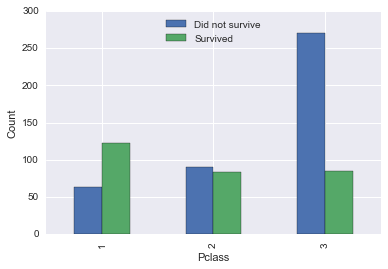

In [172]:
Pclass_survived = titanic_data.groupby(['Pclass', 'Survived']).size()
print Pclass_survived.unstack()
Pclass_survived.unstack().plot(kind = 'bar')
plt.ylabel('Count')
plt.legend(['Did not survive','Survived'],loc="upper center")

各等级乘客人数分布为：

1等：186人，2等：173人，3等：355人。

1等舱遇难64人，生还122人。

2等舱遇难90人，生还83人。

3等舱遇难270人，生还85人。

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


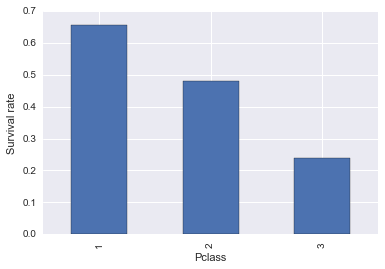

In [173]:
print titanic_data.groupby('Pclass').mean()['Survived']
titanic_data.groupby('Pclass').mean()['Survived'].plot(kind = 'bar')
plt.ylabel('Survival rate')

1等舱生还率为0.656，2等舱生还率为0.48，3等舱生还率为0.24。

数据说明，船票等级和生还率之间存在一定的相关关系。船票等级越高，乘客生还率也越高。

### 年龄变量(Age)分析

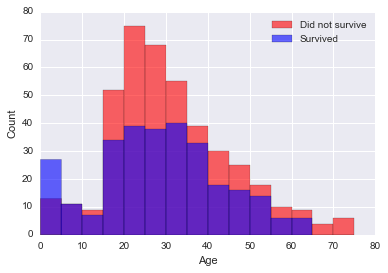

In [174]:
bins = np.arange(0, titanic_data['Age'].max(), 5)
nonsurv_vals = titanic_data[titanic_data['Survived'] == 0]['Age'].reset_index(drop = True)
surv_vals = titanic_data[titanic_data['Survived'] == 1]['Age'].reset_index(drop = True)
plt.hist(nonsurv_vals, bins = bins, alpha = 0.6,color = 'red', label = 'Did not survive')
plt.hist(surv_vals, bins = bins, alpha = 0.6,color = 'blue', label = 'Survived')
plt.legend(framealpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Count')

上图展示了数据集中所有乘客的年龄分布情况，可以看出，大部分小于10岁的乘客都生还了。

将15岁以下的乘客定义为儿童，进行进一步分析。

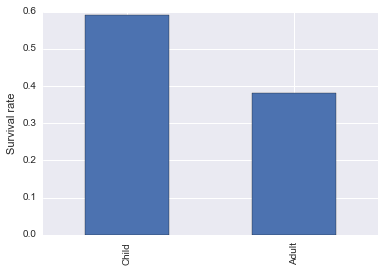

In [175]:
a=[]
a.append(titanic_data[titanic_data['Age']<=15]['Survived'].mean())
a.append(titanic_data[titanic_data['Age']>15]['Survived'].mean())
pd.Series(a,index=['Child','Adult']).plot(kind='bar')
plt.ylabel('Survival rate')

In [176]:
a

[0.59036144578313254, 0.38193343898573695]

对比儿童与成年乘客生还率发现，儿童的生还率（约0.59）高于成年乘客的生还率（约0.38）。

## 4. 数据探索-多变量分析

在这一部分，对性别（Sex）和乘客等级（Pclass）这两个因变量对生还率的共同影响进行分析。

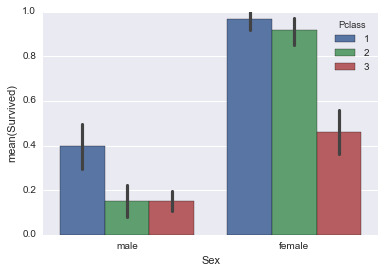

In [177]:
sns.barplot(x="Sex", y="Survived", hue="Pclass",data=titanic_data)
sns.plt.show()

通过分析上面这张图，我们可以发现:

#### 1等舱和2等舱女性乘客的生还率明显高于3等舱的女性乘客;

#### 1等舱男性乘客的生还率明显高于2等舱和3等舱的男性乘客;


这张图也再次证明了之前的单变量分析：

#### 女性乘客的生还率要高于男性乘客的生还率；

#### 1等舱乘客的生还率要高于2等舱和3等舱乘客的生还率；


## 5. 暂时性结论

通过对泰坦尼克号数据集的分析，可以发现选择的三个变量：性别、年龄和乘客等级不同程度的都会对乘客的生还率产生影响。

(a) 女性乘客比男性乘客有更高的生还率;

(b) 儿童乘客比成年乘客有更高的生还率；

(c) 等级高的乘客比等级低的乘客有较高的生还率。

另外，通过对性别和乘客等级的多变量分析，可以进一步发现：等级高的女性乘客的生还率相对非常高，而等级低的男性乘客的生还率则相对非常低的。换句话说，等级高的女性乘客更容易生还，而等级低的男性乘客更加不容易生还。


然而，这里的研究结果并不意味着这三个特征值可以完全准确的分析预测每个乘客的命运。 数据集中还有其他变量可能会对乘客的生还率也起着非常重要的作用。 例如，一个家庭的成员更有可能一起获救。此外，数据集中的一些数据可能在具有一些偏差，比如说那些没有生存的乘客所提供的信息可能是不准确的。 


## 3. 暂时性结论

通过对泰坦尼克号数据集的分析，可以发现所有四个经过探索的变量：性别、年龄、乘客等级和票价的不同取值都会对乘客的生还率产生影响。其中，女性较男性有更高的平均生还率；儿童较成年乘客有较高的平均生还率；乘客等级高的乘客较低等级乘客有较高的平均生还率；最后，生还乘客较遇难乘客所持船票价格分布更高。另外，在对性别、年龄、乘客等级三个变量的交叉分析中，发现各乘客等级中男性乘客的生还率均低于女性和儿童乘客，其中2等舱乘客中男性生还率与女性和儿童差距最大。可能的原因是2等舱乘客在逃生时，更好地执行了“妇女和儿童优先”的原则。
然而，以上差别还需要经过统计验证，才能证明分析中所体现的生还率差异为其它几个变量的变化导致，而非来源于数据的噪声。